In [10]:
#Title: z5197018 MTRN4110 Phase C
#Description: A program that reads in a maze image and 
#             outputs a text file map with wall location
#             and initial robot pose
#Author: Robin Evans
#Date: 30/07/2020

import sys
import cv2
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

MAZE_FILE_NAME = '../../../PHASEC_TEST_IMAGES/Maze_1.png'
ROBOT_FILE_NAME = '../../../PHASEC_TEST_IMAGES/Robot_1.png'
MAP_FILE_NAME = '../../Map.txt'

In [11]:
#read and show maze
maze = cv2.imread(MAZE_FILE_NAME)
if (maze.size == 0):
    sys.exit("Error: No Maze image found.")
    
maze_height, maze_width, maze_depth = maze.shape
maze_rgb = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
#plot.imshow(maze_rgb)

#read robot
robot = cv2.imread(ROBOT_FILE_NAME)
if (robot.size == 0):
    sys.exit("Error: No Robot image found.")
    
robot_rgb = cv2.cvtColor(robot, cv2.COLOR_BGR2RGB)
robot_height, robot_width, robot_depth = robot.shape
#plot.imshow(robot_rgb)

#fig, (ax1, ax2) = plot.subplots(2)
#fig.suptitle('Maze and Robot Images')
#ax1.imshow(maze_rgb)
#ax2.imshow(robot_rgb)

In [12]:
#####-----------Detect Corners-------######
#corner detect colour threshold: 
#[135,154,116], [174,255,255]

maze_hsv = cv2.cvtColor(maze, cv2.COLOR_BGR2HSV)

# Set min and max HSV values
HSL_low_thresh = np.array([135,154,116])
HSL_hi_thresh = np.array([174,255,255])

#create mask for corners
corner_post_mask = cv2.inRange(maze_hsv, HSL_low_thresh, HSL_hi_thresh)

#apply corner mask
corner_image = cv2.bitwise_and(maze_hsv, maze_hsv, mask = corner_post_mask)
kernel = np.ones((3,3), np.uint8)
corner_image = cv2.morphologyEx(corner_image, cv2.MORPH_OPEN, kernel)
#close_corner_image = cv2.morphologyEx(open_corner_image, cv2.MORPH_CLOSE, kernel)

#find edges
corner_edges = cv2.Canny(corner_image, threshold1 = 10, threshold2 = 30, apertureSize = 3)

#find contours
corner_contours, heir = cv2.findContours(corner_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not corner_contours:
    sys.exit("Error: No corners found.")
if len(corner_contours) < 4:
    sys.exit("Error: Less than 4 corners found.")
#plot.imshow(corner_edges)

#draw contours
cv2.drawContours(corner_image, corner_contours, -1, (255,0,0),2)

#get centroid coords of corners. Save in list of tuples.
maze_corners = cv2.imread(MAZE_FILE_NAME)
corner_centroid = []
for i in corner_contours:
    M = cv2.moments(i)
    if (M["m00"] != 0):
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])
        corner_centroid.append((x,y))
        cv2.circle(maze_corners, (x, y), 20, (0, 255, 0), -1)

#remove duplicates
corner_centroid = list(dict.fromkeys(corner_centroid))
          
#show image
#cv2.namedWindow('Corners. Press q to exit')
#cv2.imshow('Corners. Press q to exit', maze_corners)
#while(1):
#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cv2.destroyAllWindows()

#fig, (ax1) = plot.subplots(1)
#fig.suptitle('Maze Corners')
#ax1.imshow(maze_corners)

ValueError: too many values to unpack (expected 2)

In [106]:
#####------Organise Corners-----#####
#Find top-left corner index

    #create image-sized black image
TL_ROI_mask = np.zeros((maze_height, maze_width, 3), np.uint8)
    #highlight top-left corner
TL_ROI_mask[0:375,0:338] = (255,255,255)
    #convert to gray
TL_ROI_mask = cv2.cvtColor(TL_ROI_mask, cv2.COLOR_BGR2GRAY)
    #run thresholding
ret, thresh = cv2.threshold(TL_ROI_mask, 2, 255, cv2.THRESH_BINARY)
#plot.imshow(TL_ROI_mask)

#find contour of mask
TL_ROI_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(TL_ROI_contour)

if not TL_ROI_contour:
    sys.exit("Error: No corner found in defined top left region.")

#find index of top left coords
TL_index = 0
for i, item in enumerate(corner_centroid):
    if cv2.pointPolygonTest(TL_ROI_contour[0], corner_centroid[i], 0) >= 0:
        TL_index = i

#print(TL_index)

#Find bottom-left corner index

    #create image-sized black image
BL_ROI_mask = np.zeros((maze_height,maze_width, 3), np.uint8)
    #highlight bottom-left corner
BL_ROI_mask[375:,0:338] = (255, 255, 255)
    #convert to gray
BL_ROI_mask = cv2.cvtColor(BL_ROI_mask, cv2.COLOR_BGR2GRAY)
    #run thresholding
ret, thresh = cv2.threshold(BL_ROI_mask, 2, 255, cv2.THRESH_BINARY)
#plot.imshow(TL_ROI_mask)

#find contour of mask
BL_ROI_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(TL_ROI_contour)

if not BL_ROI_contour:
    sys.exit("Error: No corner found in defined bottom left region.")

#find index of bottom left coords
BL_index = 0
for i, item in enumerate(corner_centroid):
    if cv2.pointPolygonTest(BL_ROI_contour[0], corner_centroid[i], 0) >= 0:
        BL_index = i

#print(BL_index)

#Find Top-Right corner index

    #create image-sized black image
TR_ROI_mask = np.zeros((maze_height, maze_width, 3), np.uint8)
    #highlight top-right corner
TR_ROI_mask[0:375,1011:] = (255,255,255)
    #convert to gray
TR_ROI_mask = cv2.cvtColor(TR_ROI_mask, cv2.COLOR_BGR2GRAY)
    #run thresholding
ret, thresh = cv2.threshold(TR_ROI_mask, 2, 255, cv2.THRESH_BINARY)
#plot.imshow(TL_ROI_mask)

#find contour of mask
TR_ROI_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(TR_ROI_contour)

if not TR_ROI_contour:
    sys.exit("Error: No corner found in defined top right region.")

#find index of top right coords
TR_index = 0
for i, item in enumerate(corner_centroid):
    if cv2.pointPolygonTest(TR_ROI_contour[0], corner_centroid[i], 0) >= 0:
        TR_index = i

#print(TR_index)

#Find Bottom-Right corner index

    #create image-sized black image
BR_ROI_mask = np.zeros((maze_height, maze_width, 3), np.uint8)
    #highlight top-right corner
BR_ROI_mask[375:,1011:] = (255,255,255)
    #convert to gray
BR_ROI_mask = cv2.cvtColor(BR_ROI_mask, cv2.COLOR_BGR2GRAY)
    #run thresholding
ret, thresh = cv2.threshold(BR_ROI_mask, 2, 255, cv2.THRESH_BINARY)
#plot.imshow(TL_ROI_mask)

#find contour of mask
BR_ROI_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(TL_ROI_contour)

if not BR_ROI_contour:
    sys.exit("Error: No corner found in defined bottom right region.")

#find index of top right coords
BR_index = 0
for i, item in enumerate(corner_centroid):
    if cv2.pointPolygonTest(BR_ROI_contour[0], corner_centroid[i], 0) >= 0:
        BR_index = i

#print(BR_index)

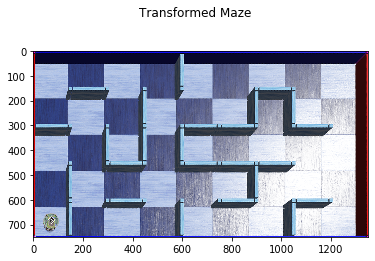

In [107]:
#####-------homography matrix creation and Transform-------####

#arrange corner centroid TR,TL,BR,BL and convert to np.array
corner_centroid = np.array([corner_centroid[TL_index], corner_centroid[TR_index], corner_centroid[BL_index], corner_centroid[BR_index]])
#print(corner_centroid)

#create array of points to transform to
dest_coords = np.array([(0,0), (maze_width,0), (0,maze_height), (maze_width,maze_height)])
#print(dest_coords)

#determine and implement homography matrix
H,stat = cv2.findHomography(corner_centroid, dest_coords)
maze_trans = cv2.warpPerspective(maze, H, (maze_width,maze_height))
#print(H)

#fig, (ax1) = plot.subplots(1)
#fig.suptitle('Transformed Maze')
#ax1.imshow(maze_trans)


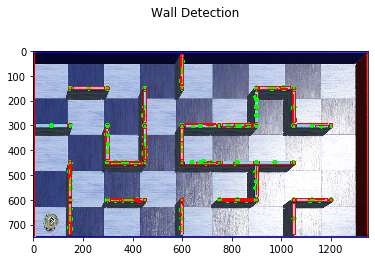

In [108]:
#####----------detect walls-------####

maze_hsv = cv2.cvtColor(maze_trans, cv2.COLOR_BGR2HSV)

HSL_low_thresh = np.array([15,21,220])
HSL_hi_thresh = np.array([100,255,255])

#create mask for internal walls
internal_wall_mask = cv2.inRange(maze_hsv,HSL_low_thresh,HSL_hi_thresh)

#apply internal wall mask
kernel = np.ones((5,5), np.uint8)
wall_image = cv2.bitwise_and(maze_hsv, maze_hsv, mask = internal_wall_mask)
wall_image = cv2.morphologyEx(wall_image, cv2.MORPH_OPEN, kernel)
#close_wall_image = cv2.morphologyEx(wall_image, cv2.MORPH_CLOSE, kernel)

#find edges
wall_edges = cv2.Canny(wall_image, threshold1 = 10, threshold2 = 30, apertureSize = 3)

#find contours
wall_contours, heir = cv2.findContours(wall_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#print(corner_contours[0])

#draw contours
cv2.drawContours(wall_image, wall_contours, -1, (255,0,0), 1)

maze_walls = maze_trans.copy()

#get centroid coords of walls. Save in list of tuples. Display walls.
wall_centroid = []
for i in wall_contours:
    M = cv2.moments(i)
    if (M["m00"] != 0) & (M["m00"] > 100):
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])
        wall_centroid.append((x,y))
        rect = cv2.minAreaRect(i)
        centroid = rect[0]
        x = int(centroid[0])
        y = int(centroid[1])
        cv2.circle(maze_walls, (x,y), 10, (0, 255, 0), -1)
        #print(rect)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(maze_walls, [box], 0, (255,0,0), 2)

#remove duplicates
wall_centroid = list(dict.fromkeys(wall_centroid))
#for i, item in enumerate(wall_centroid):
    #print(wall_centroid[i])

#show image
#cv2.namedWindow('Walls. Press q to exit.')
#cv2.resizeWindow('corners',900,700)
#cv2.imshow('Walls. Press q to exit.',maze_walls)
#while(1):
#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cv2.destroyAllWindows()

#fig, (ax1) = plot.subplots(1)
#fig.suptitle('Wall Detection')
#ax1.imshow(maze_walls)

In [109]:
#####----------Define internal wall matrices-----#####

#Define horizontal and vertical wall matrices
hori_matrix = np.zeros((6,9),np.bool)
hori_matrix[0] = np.ones((1,9))
hori_matrix[5] = np.ones((1,9))
#print(hori_matrix)
vert_matrix = np.zeros((5,10),np.bool)
vert_matrix[:,0] = True
vert_matrix[:,9] = True
#print(vert_matrix)

#define column contours
col_contours = []
i = 0
while (i < 9):
    col = np.zeros((maze_height,maze_width), np.uint8)
    col[:,i*150+25:i*150+125] = (255)
    ret, thresh = cv2.threshold(col, 2, 255, cv2.THRESH_BINARY)
    col_contour, heir = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
    col_contours.append(col_contour[0])
    i=i+1
#print(col_contours)

#define row contours
row_contours = []
i = 0
while(i < 5):
    row = np.zeros((maze_height,maze_width), np.uint8)
    row[i * 150 + 25:i * 150 + 125,:] = (255)
    ret, thresh = cv2.threshold(row, 2, 255, cv2.THRESH_BINARY)
    row_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    row_contours.append(row_contour[0])
    i = i + 1
#print(row_contours)
    
#define horzontal wall contours
hori_contours = []
i = 0
while(i < 4):
    hori = np.zeros((maze_height,maze_width), np.uint8)
    hori[i * 150 + 125:i * 150 + 175,:] = (255)
    ret, thresh = cv2.threshold(hori, 2, 255, cv2.THRESH_BINARY)
    hori_contour, heir = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    hori_contours.append(hori_contour[0])
    i = i + 1
#print(hori_contours)

#define vertical wall contours
vert_contours = []
i = 0
while(i < 8):
    vert = np.zeros((maze_height,maze_width), np.uint8)
    vert[:,i * 150 + 125:i * 150 + 175] = (255)
    ret, thresh = cv2.threshold(vert, 2, 255, cv2.THRESH_BINARY)
    vert_contour, heir = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    vert_contours.append(vert_contour[0])
    i = i + 1
#print(vert_contours)

#Search for Horizontal Walls
i = 0    
while(i < len(hori_contours)):
    j = 0
    while(j < len(col_contours)):
        for k in wall_centroid:
            if(cv2.pointPolygonTest(hori_contours[i], k, 0) >= 0) & (cv2.pointPolygonTest(col_contours[j], k, 0) >= 0):
                hori_matrix[i + 1,j] = True
        j = j + 1
    i = i + 1
#print("Horizontal Wall Matrix")
#print(hori_matrix)
i = 0    
while(i < len(row_contours)):
    j = 0
    while(j < len(vert_contours)):
        for k in wall_centroid:
            if(cv2.pointPolygonTest(row_contours[i], k, 0) >= 0) & (cv2.pointPolygonTest(vert_contours[j], k, 0) >= 0):
                vert_matrix[i,j + 1] = True
        j = j + 1
    i = i + 1
#print("Vertical Wall Matrix")
#print(vert_matrix)

Horizontal Wall Matrix
[[ True  True  True  True  True  True  True  True  True]
 [False  True False False False False  True False False]
 [ True False False False  True  True False  True False]
 [False False  True False  True  True  True False False]
 [False False  True False False  True False  True False]
 [ True  True  True  True  True  True  True  True  True]]
Vertical Wall Matrix
[[ True False False False  True False False False False  True]
 [ True False False  True False False  True  True False  True]
 [ True False  True  True  True False False False False  True]
 [ True  True False False False False  True False False  True]
 [ True  True False False  True False False  True False  True]]


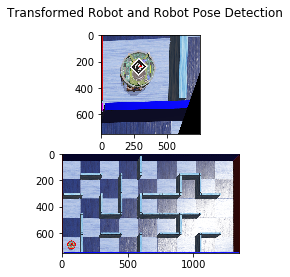

In [110]:
####----------Check for pose of robot------####

#apply transform to robot image
robot_trans = cv2.warpPerspective(robot, H, (robot_width, robot_height))

#Load aruco library
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters_create()

#search for markers
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(robot_trans, dictionary, parameters = parameters)

if not markerCorners:
    sys.exit("Error: No arUco marker detected.")

cv2.aruco.drawDetectedMarkers(robot_trans, markerCorners, markerIds)

#check heading based on relative position of corners
if(((markerCorners[0][0][0,1] - markerCorners[0][0][2,1]) > 0) & (np.absolute(markerCorners[0][0][0,1] - markerCorners[0][0][2,1]) > 50)):
    heading = "v"
    #print(heading)
if(((markerCorners[0][0][0,1] - markerCorners[0][0][2,1]) < 0) & (np.absolute(markerCorners[0][0][0,1] - markerCorners[0][0][2,1]) > 50)):
    heading = "^"
    #print(heading)
if(((markerCorners[0][0][0,0] - markerCorners[0][0][2,0]) > 0) & (np.absolute(markerCorners[0][0][0,0] - markerCorners[0][0][2,0]) > 50)):
    heading = ">"
    #print(heading)
if(((markerCorners[0][0][0,0] - markerCorners[0][0][2,0]) < 0) & (np.absolute(markerCorners[0][0][0,0] - markerCorners[0][0][2,0]) > 50)):
    heading = "<"
    #print(heading)
    
#plot.imshow(robot_trans)
#fig, (ax1, ax2) = plot.subplots(2)
#fig.suptitle('Transformed Robot and Robot Pose Detection')
#ax1.imshow(robot_trans)


HSL_low_thresh = np.array([29,0,0])
HSL_hi_thresh = np.array([115,255,255])
maze_rbt = cv2.cvtColor(maze_trans, cv2.COLOR_BGR2HSV)

#create mask for robot
kernel = np.ones((3,3), np.uint8)
robot_mask = cv2.inRange(maze_rbt,HSL_low_thresh,HSL_hi_thresh)
robot_mask = cv2.morphologyEx(robot_mask, cv2.MORPH_OPEN, kernel)
robot_mask = cv2.morphologyEx(robot_mask, cv2.MORPH_CLOSE, kernel)
robot_contour, heir = cv2.findContours(robot_mask,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)

potential_robots = []
for i in robot_contour:
    M = cv2.moments(i)
    if (M["m00"] != 0) & (M["m00"] > 100):
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])                           
        potential_robots.append((x,y))

##determine robot position
robot_r = 0
robot_c = 0
robot_coord = 0

#for potential robots, check if there are any in the corners
for i in potential_robots:
    #print(i)
    if(cv2.pointPolygonTest(row_contours[0], i, 0) >= 0) & (cv2.pointPolygonTest(col_contours[0], i, 0) >= 0):
        robot_r = 0
        robot_c = 0
        robot_coord = i
    if(cv2.pointPolygonTest(row_contours[0], i, 0) >= 0) & (cv2.pointPolygonTest(col_contours[len(col_contours)-1], i, 0) >= 0):
        robot_r = 0
        robot_c = len(col_contours) - 1
        robot_coord = i
    if(cv2.pointPolygonTest(row_contours[len(row_contours) - 1], i, 0) >= 0) & (cv2.pointPolygonTest(col_contours[0], i, 0) >= 0):
        robot_r = len(row_contours) - 1
        robot_c = 0
        robot_coord = i
    if(cv2.pointPolygonTest(row_contours[len(row_contours) - 1], i, 0) >= 0) & (cv2.pointPolygonTest(col_contours[len(col_contours) - 1], i, 0) >= 0):
        robot_r = len(row_contours) - 1
        robot_c = len(col_contours) - 1
        robot_coord = i

if (robot_coord == 0):
    sys.exit("Error: No Robot found in corners")

#print(potential_robots)
#print([robot_r,robot_c])
#print(robot_coord)

#draw on image
font = cv2.FONT_HERSHEY_PLAIN
cv2.circle(maze_trans, robot_coord, 30, (255, 0, 0), thickness=4, lineType=8, shift=0)
#cv.Line(maze_trans, pt1, pt2, color, thickness=1, lineType=8, shift=0) 
cv2.putText(maze_trans, heading, (robot_coord[0] - 20, robot_coord[1] + 20), font, 4, (255, 0, 0), 4, cv2.LINE_AA)

#show image
#cv2.namedWindow('robot')
#cv2.resizeWindow('corners',900,700)
#cv2.imshow('robot', maze_trans)
#while(1):
#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cv2.destroyAllWindows()

#ax2.imshow(maze_trans)

In [111]:
#####---------drawing text file map---------#####
#open file
map_file = open(MAP_FILE_NAME,"w")

#write out map found
wall_vert_i = 0
wall_hori_i = 0
i = 0
while(i < 6):
    j = 0
    #horizontal row
    map_file.write(" ")
    while(j < 9):
        if(hori_matrix[wall_hori_i,j] == True):
            map_file.write("--- ")
        else:
            map_file.write("    ")
        j = j + 1
    j = 0
    wall_hori_i = wall_hori_i + 1
    #vertical row
    if(wall_vert_i < 5):
        map_file.write("\n")
        map_file.write("|")
        while(j < 9):
            #internal
            map_file.write(" ")
            if (i == robot_r) & (j == robot_c):
                map_file.write(heading)
            else:
                map_file.write(" ")
            map_file.write(" ")
            #external
            if(vert_matrix[wall_vert_i][j + 1] == True):
                map_file.write("|")
            else:
                map_file.write(" ")
            j = j + 1
        map_file.write("\n")
        wall_vert_i = wall_vert_i + 1
    i = i + 1
map_file.close()